## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import seaborn as sns

## Read File

In [88]:
df = pd.read_csv('bank.csv')

In [89]:
temp = df.columns.values[0]
temp

'age'

In [90]:
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

## Checking Null Values

In [91]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

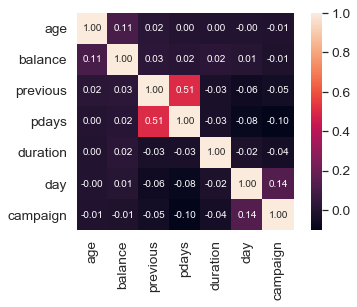

In [92]:
corrmat = df.corr()
k = 7 #number of variables for heatmap
cols = corrmat.nlargest(k, 'age')['age'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Checking Outliers

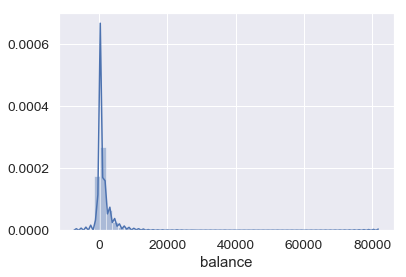

In [93]:
sns.distplot(df['balance'])

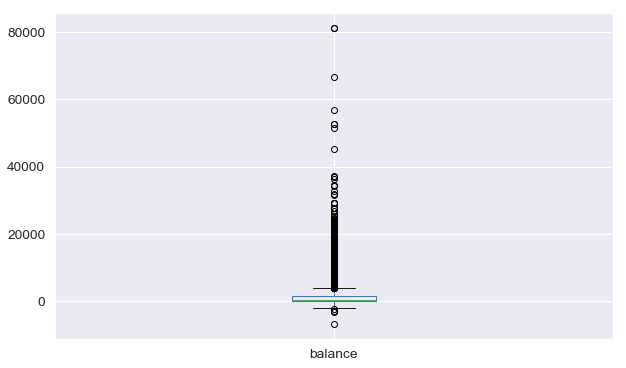

In [94]:
plt.figure(figsize=(10,6))
df.balance.plot(kind='box')

In [95]:
df['balance'].describe()

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

In [83]:
np.median(df.balance)

550.0

In [84]:
lower_bound = 0.01
upper_bound = 0.95
res = df.balance.quantile([lower_bound,upper_bound])
res

0.01    -522.00
0.95    6026.45
Name: balance, dtype: float64

In [12]:
df.drop(df[df['balance']>=6026].index,axis=0,inplace=True)

In [13]:
df.drop(df[df['balance']<=-522].index,axis=0,inplace=True)

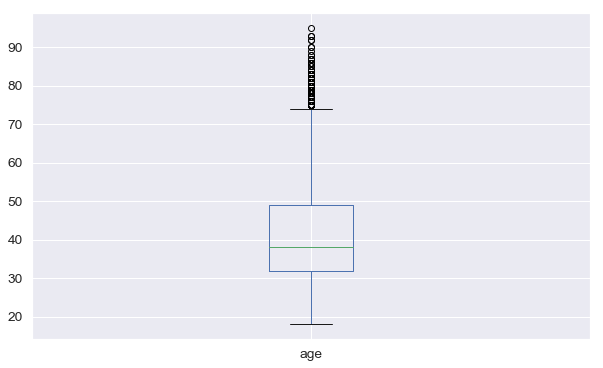

In [15]:
plt.figure(figsize=(10,6))
df.age.plot(kind='box')

In [16]:
df['age'].describe()

count    10488.000000
mean        41.068936
std         11.850983
min         18.000000
25%         32.000000
50%         38.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64

In [17]:
lower_bound = 0.01
upper_bound = 0.95
res = df.age.quantile([lower_bound,upper_bound])
res

0.01    22.0
0.95    61.0
Name: age, dtype: float64

In [18]:
df.drop(df[df['age']>=61].index,axis=0,inplace=True)

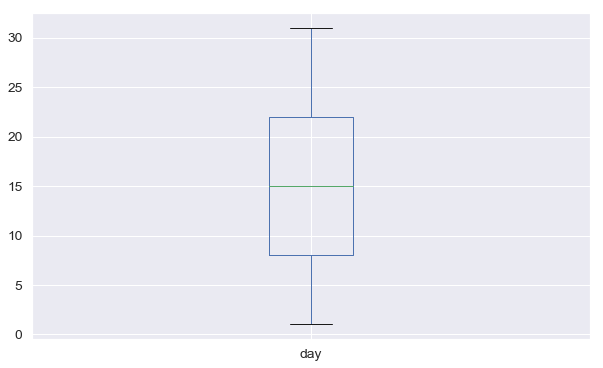

In [19]:
plt.figure(figsize=(10,6))
df.day.plot(kind='box')

In [20]:
df['day'].describe()

count    9924.000000
mean       15.645506
std         8.442077
min         1.000000
25%         8.000000
50%        15.000000
75%        22.000000
max        31.000000
Name: day, dtype: float64

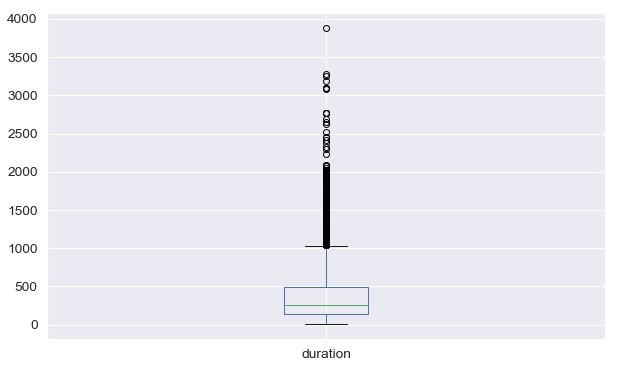

In [21]:
plt.figure(figsize=(10,6))
df.duration.plot(kind='box')

In [22]:
df['duration'].describe()

count    9924.000000
mean      371.183797
std       351.491112
min         2.000000
25%       135.000000
50%       251.500000
75%       495.000000
max      3881.000000
Name: duration, dtype: float64

In [23]:
lower_bound = 0.01
upper_bound = 0.95
res = df.duration.quantile([lower_bound,upper_bound])
res

0.01      13.00
0.95    1084.85
Name: duration, dtype: float64

In [24]:
df.drop(df[df['duration']>=1084.85].index,axis=0,inplace=True)

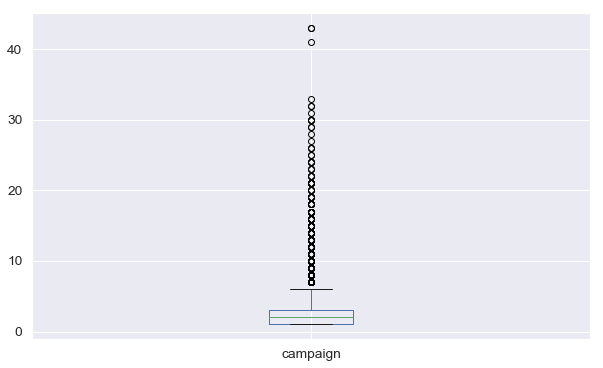

In [25]:
plt.figure(figsize=(10,6))
df.campaign.plot(kind='box')

In [26]:
df['campaign'].describe()

count    9427.000000
mean        2.527421
std         2.738432
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        43.000000
Name: campaign, dtype: float64

In [27]:
lower_bound = 0.01
upper_bound = 0.95
res = df.campaign.quantile([lower_bound,upper_bound])
res

0.01    1.0
0.95    7.0
Name: campaign, dtype: float64

In [28]:
df.drop(df[df['campaign']>=7].index,axis=0,inplace=True)

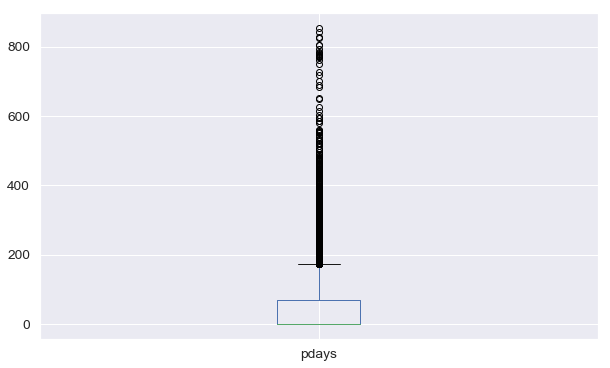

In [29]:
plt.figure(figsize=(10,6))
df.pdays.plot(kind='box')

In [30]:
df["pdays"].describe()

count    8903.000000
mean       53.939796
std       112.699570
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        68.500000
max       854.000000
Name: pdays, dtype: float64

In [31]:
lower_bound = 0.01
upper_bound = 0.95
res = df.pdays.quantile([lower_bound,upper_bound])
res

0.01     -1.0
0.95    335.9
Name: pdays, dtype: float64

In [32]:
df.drop(df[df['pdays']>=335.9].index,axis=0,inplace=True)

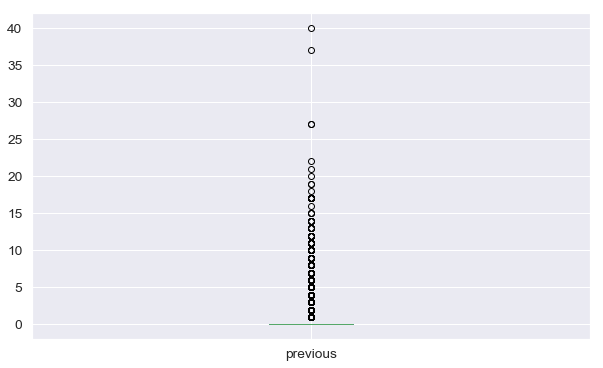

In [33]:
plt.figure(figsize=(10,6))
df.previous.plot(kind='box')

In [34]:
df['previous'].describe()

count    8457.000000
mean        0.743763
std         2.046518
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        40.000000
Name: previous, dtype: float64

In [35]:
lower_bound = 0.01
upper_bound = 0.95
res = df.previous.quantile([lower_bound,upper_bound])
res

0.01    0.0
0.95    5.0
Name: previous, dtype: float64

In [36]:
df.drop(df[df['previous']>=5].index,axis=0,inplace=True)

In [37]:
df.head()

age         job   marital  education default  balance housing loan  \
0   59      admin.   married  secondary      no     2343     yes   no   
3   55    services   married  secondary      no     2476     yes   no   
4   54      admin.   married   tertiary      no      184      no   no   
5   42  management    single   tertiary      no        0     yes  yes   
7   60     retired  divorced  secondary      no      545     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may      1042         1     -1         0  unknown     yes  
3  unknown    5   may       579         1     -1         0  unknown     yes  
4  unknown    5   may       673         2     -1         0  unknown     yes  
5  unknown    5   may       562         2     -1         0  unknown     yes  
7  unknown    6   may      1030         1     -1         0  unknown     yes

## Data Pre-Processing

In [38]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['contact'] = le.fit_transform(res_df['contact'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    return res_df

In [39]:
encoded_df = preprocessor(df)
encoded_df.head(2)

age  job  marital  education  default  balance  housing  loan  contact  \
0   59    0        1          1        0     2343        1     0        2   
3   55    7        1          1        0     2476        1     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  deposit  
0    5      8      1042         1     -1         0         3        1  
3    5      8       579         1     -1         0         3        1

In [40]:
x = encoded_df.drop('deposit',axis=1).values
y = encoded_df['deposit'].values

### Split Data into Train and Test data sets

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

## Build Decision Tree Model

### Decision Tree with Cart(Gini)

###### Decision Tree with depth 2

In [42]:
model_dt_2 = DecisionTreeClassifier(random_state=1,max_depth=2)

model_dt_2.fit(x_train,y_train)

model_dt_2_score_tarin = model_dt_2.score(x_train,y_train)

model_dt_2_score_test = model_dt_2.score(x_test,y_test)

print('Training Score',model_dt_2_score_tarin)

print('Testing Score',model_dt_2_score_test)

Trining Score 0.7570049813200498
Testing Score 0.7465753424657534


###### Decision Tree with depth 4

In [43]:
model_dt_4 = DecisionTreeClassifier(random_state=1,max_depth=4)

model_dt_4.fit(x_train,y_train)

model_dt_4_score_tarin = model_dt_4.score(x_train,y_train)

model_dt_4_score_test = model_dt_4.score(x_test,y_test)

print('Training Score',model_dt_4_score_tarin)

print('Testing Score',model_dt_4_score_test)

Trining Score 0.7806662515566625
Testing Score 0.7708592777085927


###### Decision Tree with depth 6

In [44]:
model_dt_6 = DecisionTreeClassifier(random_state=1,max_depth=6)

model_dt_6.fit(x_train,y_train)

model_dt_6_score_tarin = model_dt_6.score(x_train,y_train)

model_dt_6_score_test = model_dt_6.score(x_test,y_test)

print('Training Score',model_dt_6_score_tarin)

print('Testing Score',model_dt_6_score_test)

Trining Score 0.8273661270236613
Testing Score 0.7976338729763387


###### Decision Tree with depth 8

In [45]:
model_dt_8 = DecisionTreeClassifier(random_state=1,max_depth=8)

model_dt_8.fit(x_train,y_train)

model_dt_8_score_tarin = model_dt_8.score(x_train,y_train)

model_dt_8_score_test = model_dt_8.score(x_test,y_test)

print('Training Score',model_dt_8_score_tarin)

print('Testing Score',model_dt_8_score_test)

Trining Score 0.8602117061021171
Testing Score 0.8163138231631383


###### Decision Tree with depth 10

In [46]:
model_dt_10 = DecisionTreeClassifier(random_state=1,max_depth=10)

model_dt_10.fit(x_train,y_train)

model_dt_10_score_tarin = model_dt_10.score(x_train,y_train)

model_dt_10_score_test = model_dt_10.score(x_test,y_test)

print('Trining Score',model_dt_10_score_tarin)

print('Testing Score',model_dt_10_score_test)

Trining Score 0.8978829389788294
Testing Score 0.8075965130759651


#### Decision Tree with depth 12

In [47]:
model_dt_12 = DecisionTreeClassifier(random_state=1,max_depth=12)

model_dt_12.fit(x_train,y_train)

model_dt_12_score_tarin = model_dt_12.score(x_train,y_train)

model_dt_12_score_test = model_dt_12.score(x_test,y_test)

print('Trining Score',model_dt_12_score_tarin)

print('Testing Score',model_dt_12_score_test)

Trining Score 0.9325965130759651
Testing Score 0.8032378580323786


### Decision Tree with c4.5(entropy)

In [48]:
model_dt = DecisionTreeClassifier(max_depth=10,criterion='entropy')

model_dt.fit(x_train,y_train)

y_pred_dt = model_dt.predict_proba(x_test)[:,1]
# y_pred_dt

model_dt_score_train = model_dt.score(x_train,y_train)
print(model_dt_score_train)

model_dt_score_test = model_dt.score(x_test,y_test)
print(model_dt_score_test)

0.8824719800747198
0.811332503113325


## Graphical Represetation of Tree

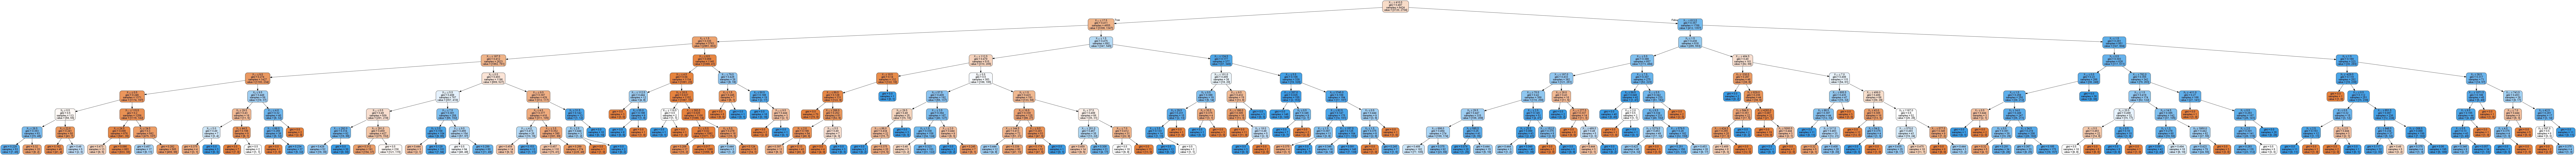

<Figure size 720x576 with 0 Axes>

In [49]:
plt.figure(figsize=(10,8))
dot_data = StringIO()
export_graphviz(model_dt_8,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Performance Matrics

In [50]:
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_dt)
roc_auc_dt = auc(fpr_dt,tpr_dt)

In [51]:
predictions = model_dt_6.predict(x_test)
# print(predictions)

print(model_dt_6.score(x_test,y_test))
y_actual_result = y_test[0]
# print(y_actual_result)

0.7976338729763387


In [52]:
for i in range(len(predictions)):
    if (predictions[i]==1):
        y_actual_result = np.vstack((y_actual_result,y_test[i]))
#         print(y_actual_result)

## Insert New Column with Prediction

In [53]:
print(predictions)

[0 0 0 ... 0 0 0]


In [54]:
df_preditor_without_target = encoded_df.drop('deposit',axis=1).values
df_preditor_only_target = encoded_df['deposit'].values

In [55]:
print(df_preditor_only_target)

[1 1 1 ... 0 0 0]


In [56]:
predictions1 = model_dt_6.predict(df_preditor_without_target)

In [57]:
print(predictions1)

[1 0 1 ... 0 0 1]


In [58]:
encoded_df['test_data'] = np.where(df_preditor_only_target,predictions1,df_preditor_only_target)

In [59]:
df['test_data'] = np.where(df_preditor_only_target,predictions1,df_preditor_only_target)

In [60]:
encoded_df.head(3)

age  job  marital  education  default  balance  housing  loan  contact  \
0   59    0        1          1        0     2343        1     0        2   
3   55    7        1          1        0     2476        1     0        2   
4   54    0        1          2        0      184        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  deposit  \
0    5      8      1042         1     -1         0         3        1   
3    5      8       579         1     -1         0         3        1   
4    5      8       673         2     -1         0         3        1   

   test_data  
0          1  
3          0  
4          1

In [61]:
df.head(3)

age       job  marital  education default  balance housing loan  contact  \
0   59    admin.  married  secondary      no     2343     yes   no  unknown   
3   55  services  married  secondary      no     2476     yes   no  unknown   
4   54    admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  test_data  
0    5   may      1042         1     -1         0  unknown     yes          1  
3    5   may       579         1     -1         0  unknown     yes          0  
4    5   may       673         2     -1         0  unknown     yes          1

In [62]:
df['test_data'].replace(to_replace=1,value='True',inplace=True)

In [63]:
df['test_data'].replace(to_replace=0,value='False',inplace=True)

In [64]:
df.to_csv('Bank_with_Prediction.csv')

## Recall

In [65]:
y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
    if (result == 1):
        count +=1
print("true yes|predict true yes:")
print(count/float(len(y_actual_result)))

true yes|predict true yes:
0.794425087108014


## Area Under the Curve

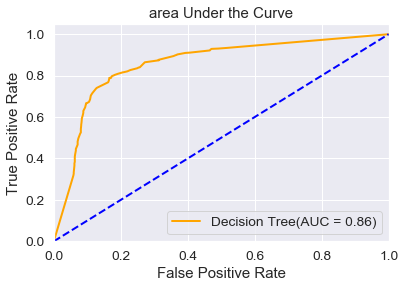

In [66]:
plt.figure(1)
lw=2
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")

## Confusion Matrix

In [67]:
print(confusion_matrix(y_test,predictions))

[[825 117]
 [208 456]]


In [68]:
accuracy_score(y_test,predictions)

0.7976338729763387

In [69]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model,normalize=False):
    cm = confusion_matrix(y_test,model,labels=[0,1])
    classes = ["Success","Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matix"
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        cm = np.around(cm,decimals=3)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

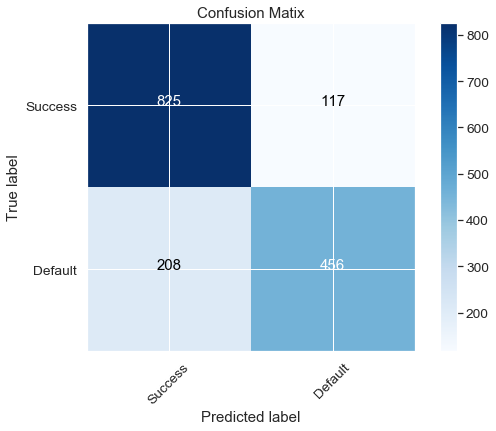

In [70]:
plt.figure(figsize=(8,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()

## prunning of the Tree

In [71]:
from sklearn.tree._tree import TREE_LEAF
def prune_index(inner_tree, index, threshold):
    if inner_tree.value[index].min()<threshold:
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
    # if there are children visit them as well
    if inner_tree.children_left[index] !=TREE_LEAF:
        prune_index(inner_tree,inner_tree.children_left[index],threshold)
        prune_index(inner_tree,inner_tree.children_right[index],threshold)
        
print(sum(model_dt.tree_.children_left<0))
# start pruning from the root
prune_index(model_dt.tree_,0,5)
sum(model_dt.tree_.children_left<0)

# it means that the code has created(314-264)=50 new leaf nodes
# (by practically removing links to their ancesters). The tree, which has looked before like

272


328

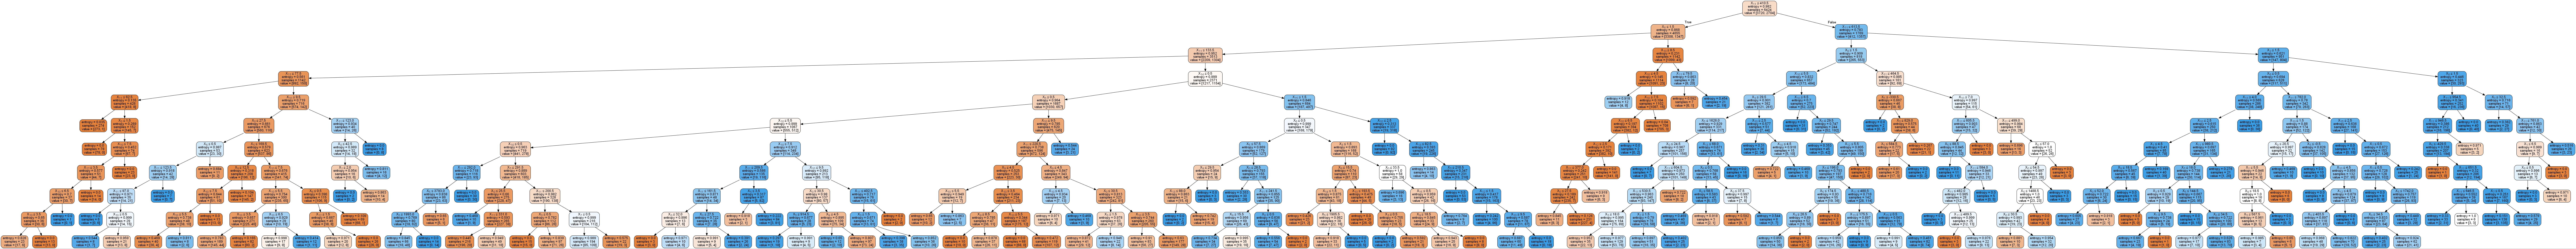

<Figure size 720x576 with 0 Axes>

In [72]:
plt.figure(figsize=(10,8))
dot_data = StringIO()
export_graphviz(model_dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_jpg())
# graph.write_pdf('pruning.pdf')
# graph.write_png('pruning.png')